<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project Name: Flight Fare Prediction 
#### using ML and Auto SK Learn(Auto ML)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv("flight data.csv")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df1= pd.read_csv("flight test.csv")


In [7]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
### We will combine both the data for the purpose of Feature Engineering

In [9]:
total_df= df.append(df1,sort= False)

In [10]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
total_df.shape


(13354, 11)

In [12]:
### Understanding our Data


In [13]:
#### Size of training set: 10683 records

#### Size of test set: 2671 records

### FEATURES: 

#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket

In [14]:
df['Airline'].value_counts() ## checking for airline data

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df['Airline'].value_counts() ## checking for airline data

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

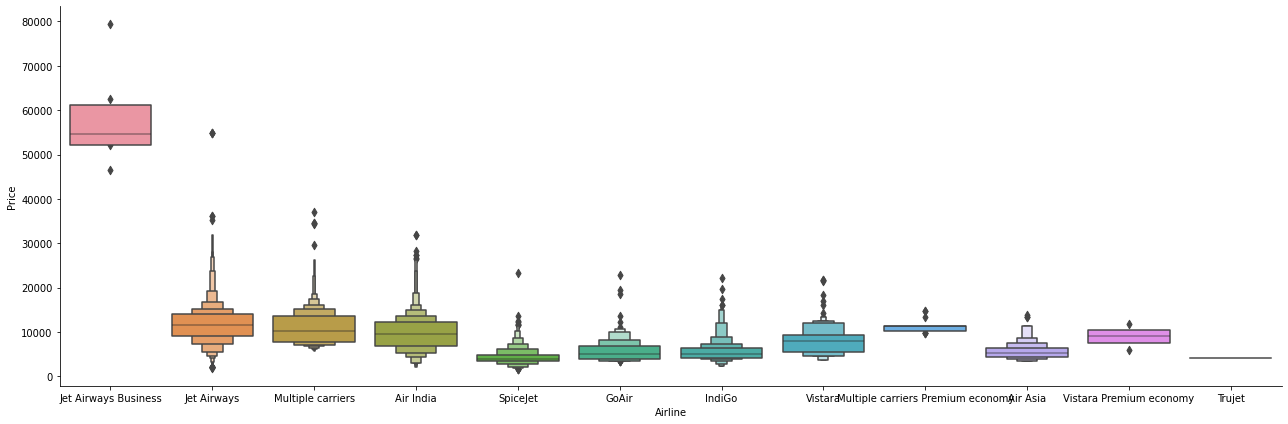

In [16]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [17]:
df['Source'].value_counts() ## checking for Source


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

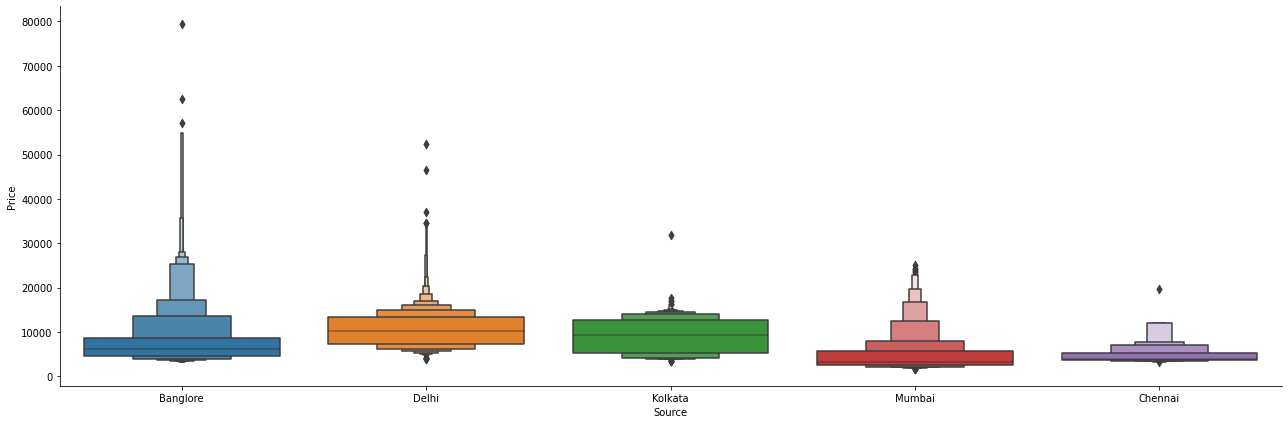

In [18]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [19]:
df['Destination'].value_counts() ## checking for Destination


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

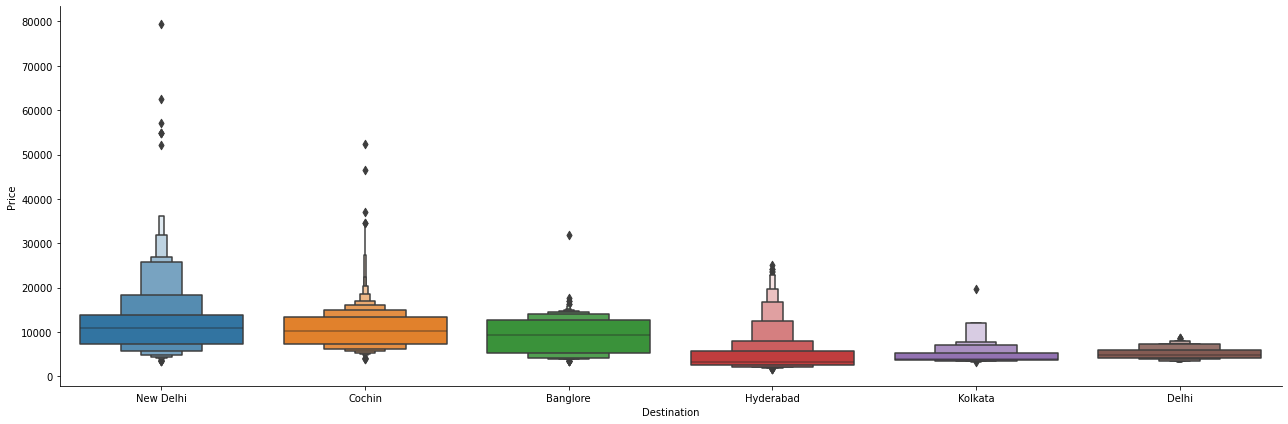

In [20]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [21]:
df['Duration'].value_counts()


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [22]:
### Feature Engineering


In [23]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [24]:
total_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [25]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)


In [26]:
total_df.dtypes


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [27]:
total_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [28]:
total_df['Additional_Info'].value_counts()


No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

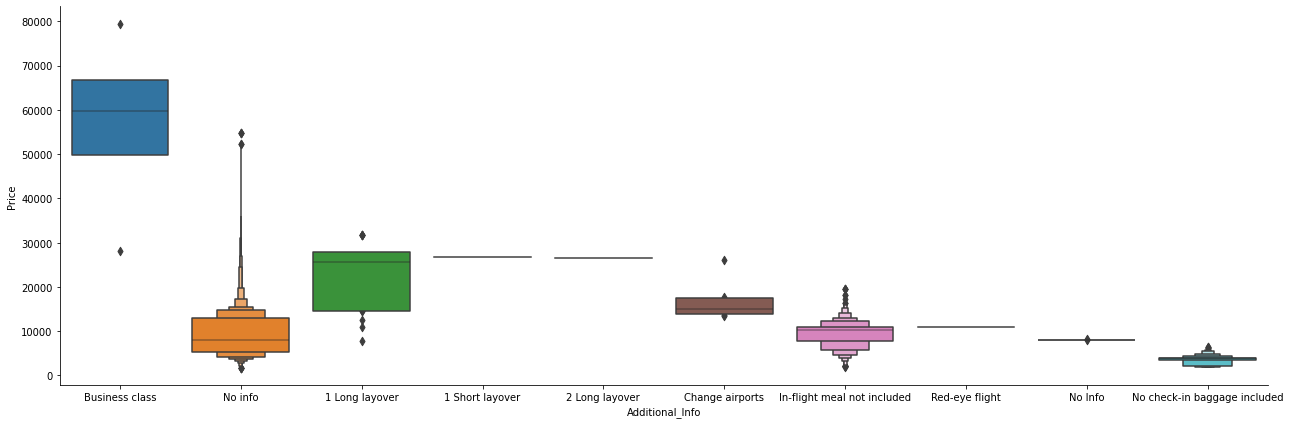

In [29]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [30]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]


In [31]:
total_df['Total_Stops'].value_counts()


1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [32]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')


In [33]:
total_df['Total_Stops'].isnull().sum()


0

In [34]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')


In [35]:
total_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [36]:
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]


In [37]:
total_df=total_df.drop(['Total_Stops'],axis=1)


In [38]:
total_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,03,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,05,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,06,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,05,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,01,03,2019,1


In [39]:
total_df.dtypes


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
Stop                object
dtype: object

In [40]:
total_df['Stop']=total_df['Stop'].astype(int)


In [41]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]


In [42]:
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [43]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,03,2019,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,05,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,06,2019,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,05,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,01,03,2019,1,21,35


In [44]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [45]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [46]:
total_df['Route_1']= total_df['Route'].str.split('→ ').str[0]
total_df['Route_2']= total_df['Route'].str.split('→ ').str[1]
total_df['Route_3']= total_df['Route'].str.split('→ ').str[2]
total_df['Route_4']= total_df['Route'].str.split('→ ').str[3]
total_df['Route_5']= total_df['Route'].str.split('→ ').str[4]

In [47]:
total_df['Route_1'].fillna("None",inplace=True)
total_df['Route_2'].fillna("None",inplace=True)
total_df['Route_3'].fillna("None",inplace=True)
total_df['Route_4'].fillna("None",inplace=True)
total_df['Route_5'].fillna("None",inplace=True)

In [48]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)

In [49]:
total_df.isnull().sum()


Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

In [50]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)


In [51]:
### Let us now convert all these varibales in the form our model can understand, here we will use Lable Enocoder


In [52]:
from sklearn.preprocessing import LabelEncoder


In [53]:
le= LabelEncoder()


In [54]:
total_df["Airline"]=le.fit_transform(total_df['Airline'])
total_df["Source"]=le.fit_transform(total_df['Source'])
total_df["Destination"]=le.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=le.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=le.fit_transform(total_df['Route_1'])
total_df["Route_2"]=le.fit_transform(total_df['Route_2'])
total_df["Route_3"]=le.fit_transform(total_df['Route_3'])
total_df["Route_4"]=le.fit_transform(total_df['Route_4'])
total_df["Route_5"]=le.fit_transform(total_df['Route_5'])

In [55]:
total_df.head()


,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,03,2019,0,01,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,05,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,06,2019,2,04,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,05,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,01,03,2019,1,21,35,16,50,0,34,8,12,4


In [56]:
total_df= total_df.drop(['Year'], axis=1)


In [57]:
## Feature Selection


In [58]:
x= total_df.drop(['Price'],axis=1)
y= total_df['Price']

In [59]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [62]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [63]:
model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [64]:
selected_features=x_train.columns[(model.get_support())]


In [65]:
selected_features


Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [66]:
from sklearn.ensemble import ExtraTreesRegressor


In [67]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)

ExtraTreesRegressor()

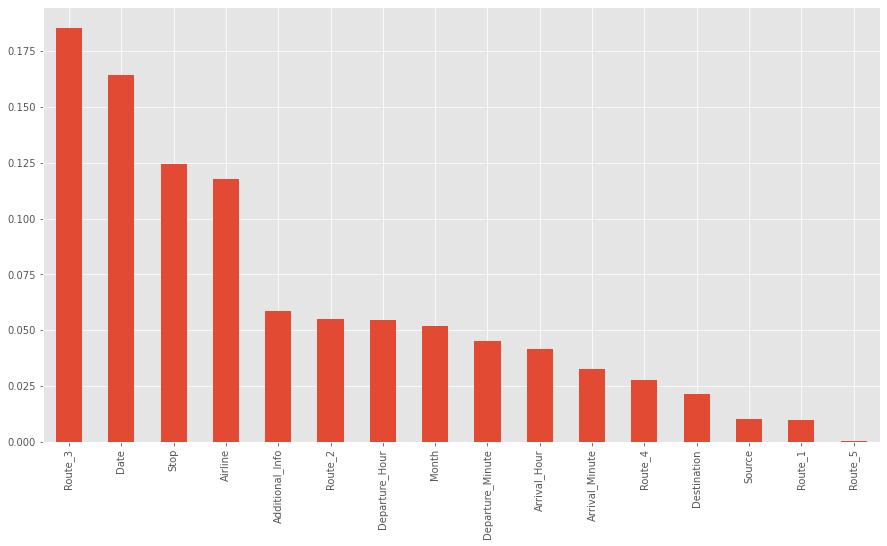

In [68]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(x_test)


In [71]:
reg_rf.score(x_train, y_train)


0.9473059833583196

In [72]:
reg_rf.score(x_test, y_test)


0.6158166500688289

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


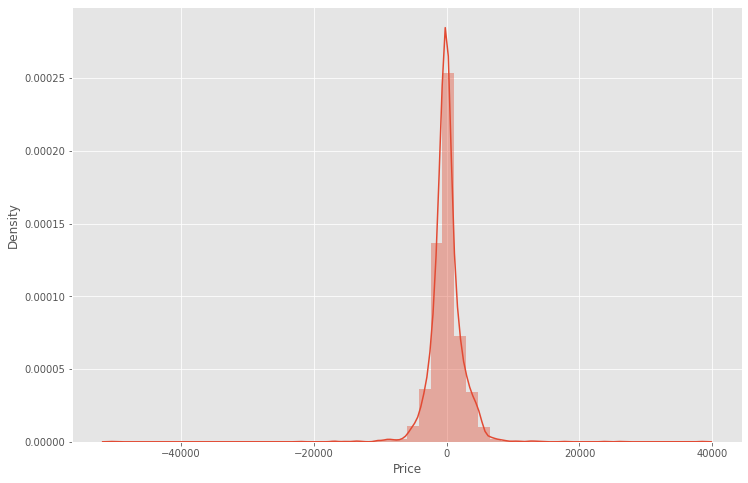

In [73]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

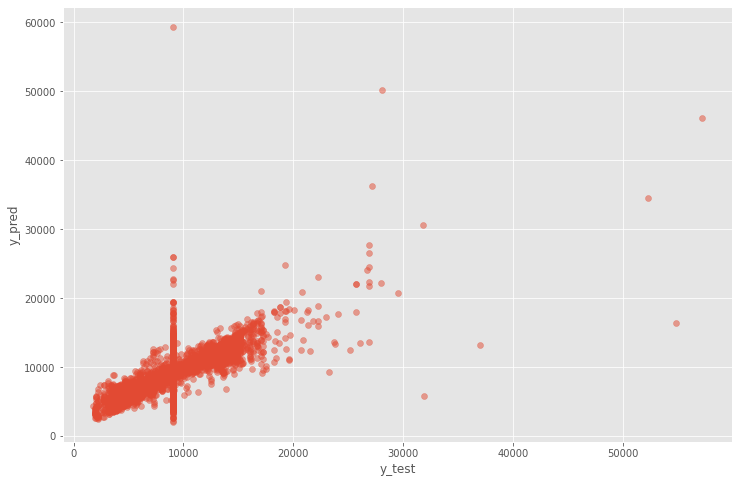

In [74]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1528.8929946963701
MSE: 6387354.074416526
RMSE: 2527.3215217729075


In [76]:
metrics.r2_score(y_test, y_pred)


0.6158166500688289

In [77]:
### Hypertuning our Model


In [78]:
from sklearn.model_selection import RandomizedSearchCV


In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [80]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [81]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [82]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [84]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [85]:
reg_rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [86]:
ypred1= reg_rf.predict(x_test)


In [87]:
ypred1


array([10198.72904175,  8979.13840817,  8767.38958906, ...,
        4411.49766874,  7996.5334114 ,  9960.16078338])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


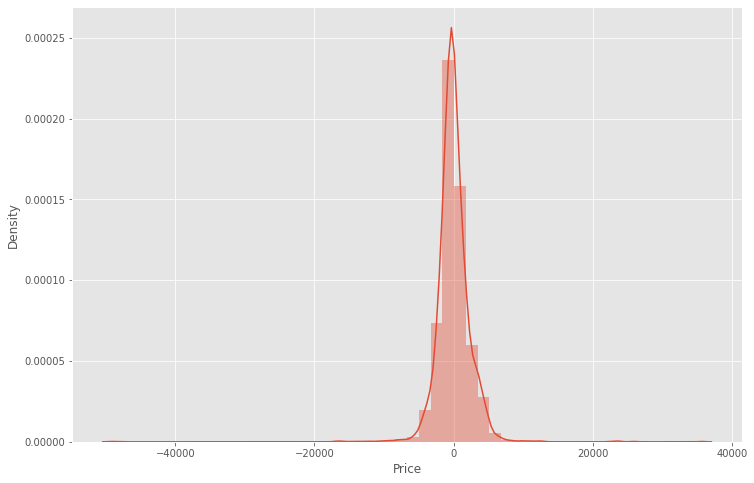

In [88]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

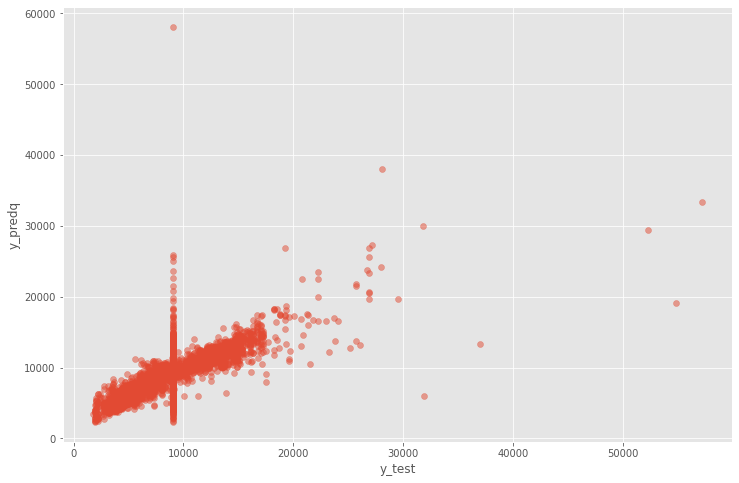

In [89]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [90]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1556.6488757854934
MSE: 6139392.848410304
RMSE: 2477.7798224237567


In [91]:
metrics.r2_score(y_test, ypred1)


0.6307308967741538